<a href="https://colab.research.google.com/github/arthursuc/MetodosComputacionales1012/blob/main/Students/Arthur_1047/Tareas/Actividad02_Librerias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ingrese la velocidad de la moto:15
Ingrese la aceleración del policía:3
el valor de t en que se cruzan los dos móviles es [10.]


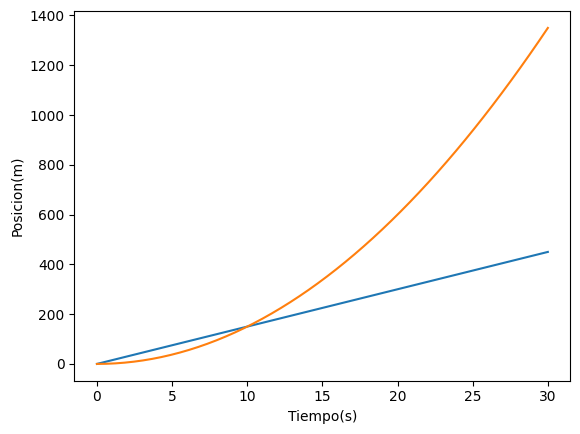

In [2]:
vm = float(input("Ingrese la velocidad de la moto:"))
ap = float(input("Ingrese la aceleración del policía:"))
#Intervalo de tiempo
t = np.linspace(0,30,50)
fmoto = lambda t: vm*t
fpol = lambda t: 1/2*ap*t**2
#Coeficientes de la resta de las dos funciones
coefficients = np.array([(-1/2)*ap,vm])
print("el valor de t en que se cruzan los dos móviles es", np.roots(coefficients))
plt.xlabel("Tiempo(s)")
plt.ylabel("Posicion(m)")
plt.plot(t,fmoto(t))
plt.plot(t,fpol(t))

5---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




3.552713678800501e-15


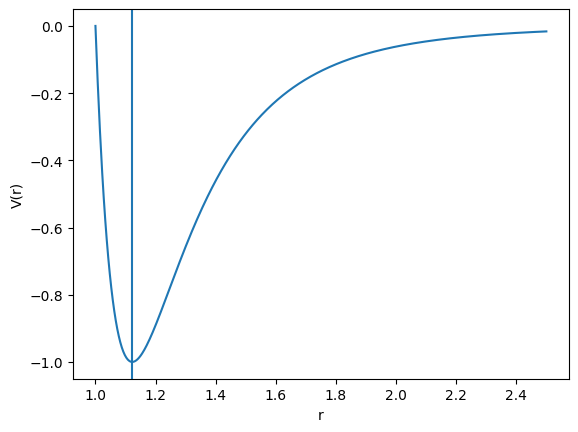

In [2]:
import sympy as sp

def potencialLJ(E,sigma):
  E = E
  sigma = sigma

  Vr = lambda x:4*E*((sigma/x)**12-(sigma/x)**6)
  x = np.linspace(1,2.5*sigma,600)


  #Derivada de la funcion
  Vr_prima = lambda x:4*E*((6*sigma**6)/x**7-(12*sigma**12)/x**13)
#Evaluar en el valor indicado
  cero = Vr_prima(2**(1/6)*sigma)

  print(cero)
#Al hacer el print, se puede ver que el valor es muy cercano a cero
  plt.axvline(x=(2**(1/6))*sigma)
  plt.xlabel("r")
  plt.ylabel("V(r)")
  plt.plot(x,Vr(x))

potencialLJ(1,1)

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [35]:
import pandas as pd
from googletrans import Translator
# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

alturas = alturas.drop('Boys 19 (in)',axis=1)
alturas = alturas.drop('Girls 19 (in)',axis=1)

In [36]:
translator = Translator()


In [37]:
#esto la vdd tarda bastante, pero kulpamianoes(maso 2min)
contador = 0
for i in alturas['Country']:
  try:
    traduction = translator.translate(i,dest="es")
    alturas.iloc[contador, 0] = traduction.text
    contador += 1
  except:
    traduction = i
    alturas.iloc[contador, 0] = traduction
    contador += 1
alturas= alturas.rename(columns={'Unnamed: 0':'Paises','Average Height, Boys, 19 yo (cm)↓':'Promedio altura chicos (cm)↓','Girls 19 (cm)': 'Chicas (cm)'})
alturas = alturas.drop('Country',axis=1)

<ipython-input-37-4af2c145fc86>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Países Bajos' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  alturas.iloc[contador, 0] = traduction.text


In [39]:
income

,Unnamed: 0,Country,Wealth per Adult 2022↓,GDP per Adult 2022,Total Wealth 2022,Share of World Wealth 2022
0,NaN,Switzerland,"$685,226","$120,431",$4.8T,1.1%
1,NaN,Luxembourg,"$585,950","$163,432",$299B,0.1%
2,NaN,United States,"$551,347","$100,380",$139.9T,30.8%
3,NaN,Hong Kong,"$551,194","$57,168",$3.5T,0.8%
4,NaN,Iceland,"$498,290","$102,597",$129B,NaN
...,...,...,...,...,...,...
215,NaN,Anguilla,NaN,"$32,835",NaN,NaN
216,NaN,Cook Islands,NaN,"$29,907",NaN,NaN
217,NaN,Nauru,NaN,"$23,044",NaN,NaN
218,NaN,Tuvalu,NaN,"$7,773",NaN,NaN
